# importing  some packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# the way to read the file

In [2]:
df = pd.read_csv('Unemployment in India.csv')

# show the information of the dataset

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# show the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Analysing the data trough the ProfileReport tool

In [5]:
from ydata_profiling import ProfileReport

In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# cheack for the missing values
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
# we noticed that the percentage of the missing cells are less than 5%, 
#so we can drop them in the data, even if is not the best way 
df.dropna(axis=0, inplace=True)

In [9]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
# cheack for the duplicates
df.duplicated().sum()

0

In [11]:
# drop the duplicated in the data
df.drop_duplicates(keep = 'first', inplace =True)

In [12]:
df.duplicated().sum()

0

In [13]:
#descriptive statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


<Axes: ylabel='Frequency'>

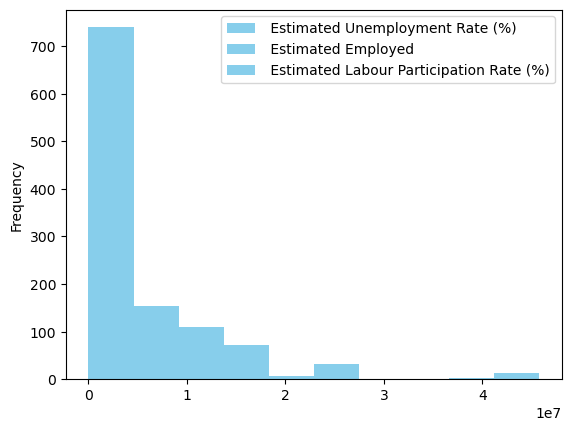

In [14]:
# verification of the distribution of the data
df.plot(kind='hist', color='skyblue')

<Axes: >

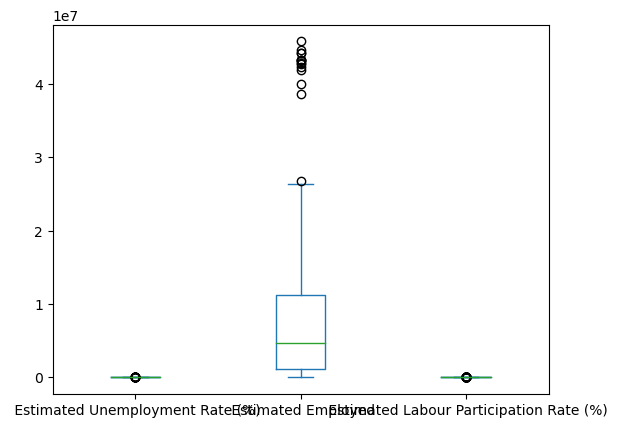

In [15]:
# cheack for the outliers 
df.plot(kind='box')

In [16]:
float_col=[]
for i in df.columns:
    if df[i].dtype =='float64':
        float_col.append(i)

In [17]:
float_col

[' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)']

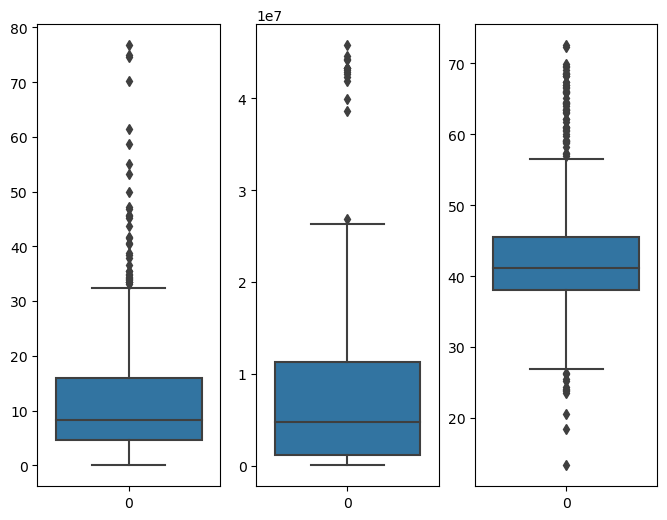

In [18]:
plt.figure(figsize=(8,6))
for i,v in enumerate(float_col):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[v])

In [19]:
[col for col in float_col]

[' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)']

In [20]:
 #treat for the outliers
#def treat_outliers(col):
Q1, Q3 = df[' Estimated Unemployment Rate (%)'].quantile([0.25, 0.75])
IQR = Q3-Q1
Lower = Q1-(1.5*IQR)
Upper = Q3+(1.5*IQR)
   # return Lower, Upper 


In [21]:
# remove the outliers 
df=df[(df[' Estimated Unemployment Rate (%)']<26)& (df[' Estimated Unemployment Rate (%)']>0)]

<Axes: ylabel='Frequency'>

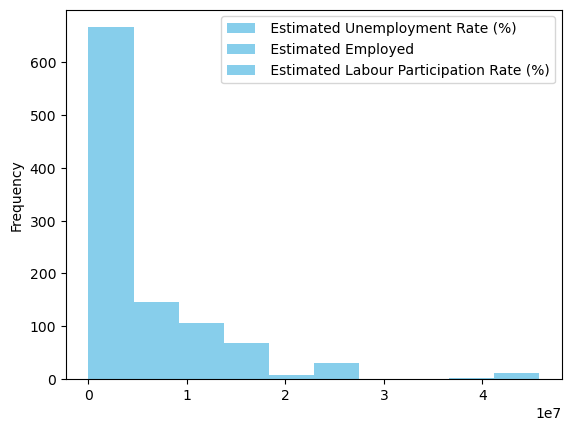

In [22]:
df.plot(kind='hist', color='skyblue')

In [23]:
'''plt.figure(figsize=(8,6))
for i,v in enumerate(float_col):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[v])'''

'plt.figure(figsize=(8,6))\nfor i,v in enumerate(float_col):\n    plt.subplot(1,3,i+1)\n    sns.boxplot(df[v])'

In [24]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# EDA of the dataset
  - visualizng the data
   - using of some plots to show the trends in the data

C:\Users\akim\AppData\Local\Temp\ipykernel_9996\3837106764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[' Date'], y=df[' Estimated Employed'], ci=None)


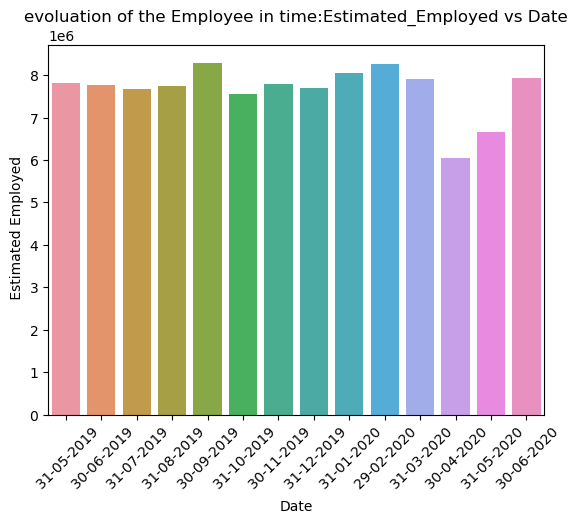

In [25]:
# visualize the data
sns.barplot(x=df[' Date'], y=df[' Estimated Employed'], ci=None)
plt.xlabel('Date')
plt.ylabel(' Estimated Employed')
plt.xticks(rotation=45)
plt.title('evoluation of the Employee in time:Estimated_Employed vs Date')
plt.show();

C:\Users\akim\AppData\Local\Temp\ipykernel_9996\1511354086.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=df[' Date'], y=df[' Estimated Employed'], ci=None)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


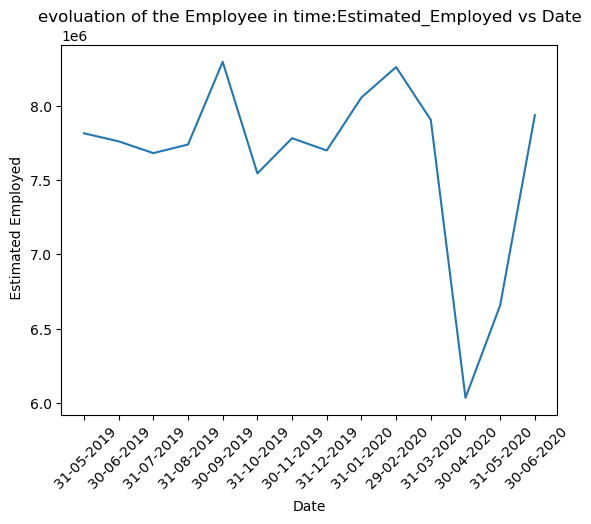

<Figure size 640x480 with 0 Axes>

In [26]:
# visualize the data
sns.lineplot(data=df, x=df[' Date'], y=df[' Estimated Employed'], ci=None)
plt.xlabel('Date')
plt.ylabel(' Estimated Employed')
plt.xticks(rotation=45)
plt.title('evoluation of the Employee in time:Estimated_Employed vs Date')
plt.show()
plt.savefig('line.pdf');

C:\Users\akim\AppData\Local\Temp\ipykernel_9996\419537609.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=df[' Date'], y=df[' Estimated Unemployment Rate (%)'], ci=None)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


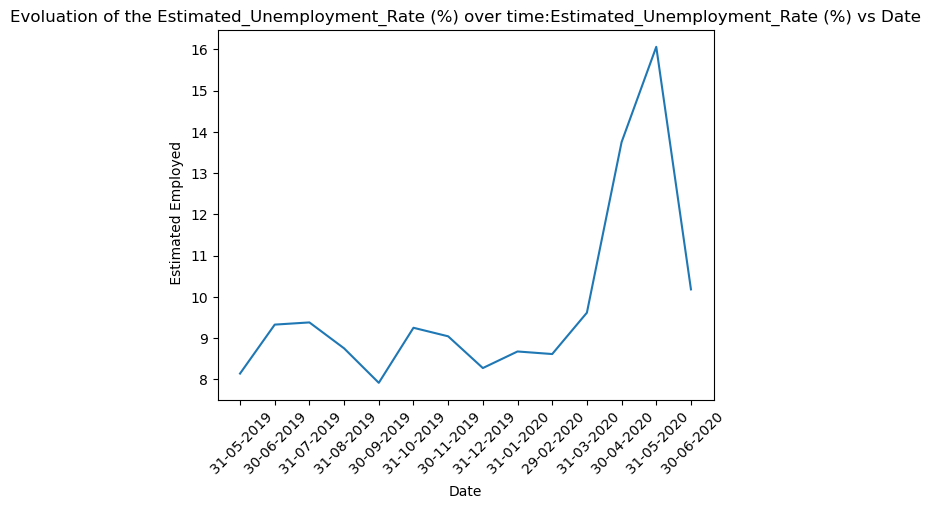

<Figure size 640x480 with 0 Axes>

In [27]:
sns.lineplot(data=df, x=df[' Date'], y=df[' Estimated Unemployment Rate (%)'], ci=None)
plt.xlabel('Date')
plt.ylabel(' Estimated Employed')
plt.xticks(rotation=45)
plt.title('Evoluation of the Estimated_Unemployment_Rate (%) over time:Estimated_Unemployment_Rate (%) vs Date')
plt.show()
plt.savefig('line_.pdf');

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


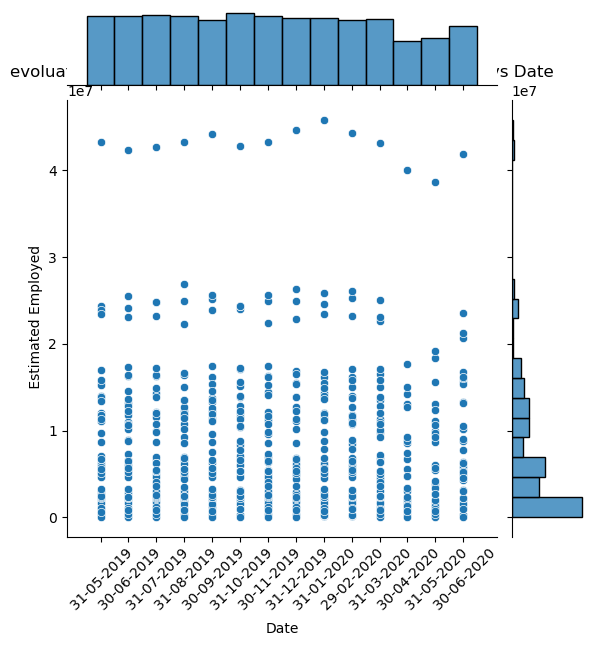

In [28]:
# visualize the data
sns.jointplot(df, x=df[' Date'], y=df[' Estimated Employed'])
plt.xlabel('Date')
plt.ylabel(' Estimated Employed')
plt.xticks(rotation=45)
plt.title('evoluation of the Employee in time:Estimated_Employed vs Date')
plt.show();

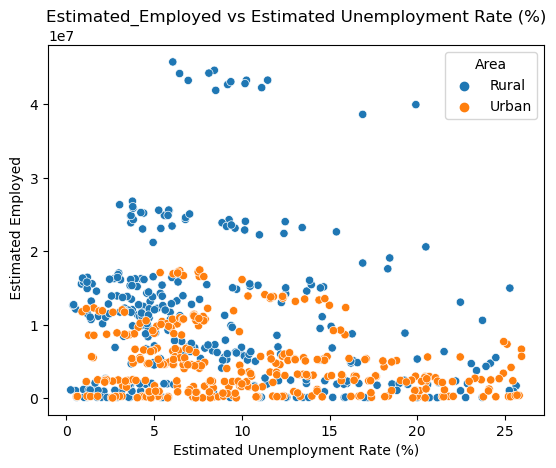

In [29]:
# visualize the data
sns.scatterplot(df, x=df[' Estimated Unemployment Rate (%)'], y=df[' Estimated Employed'], hue='Area')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel(' Estimated Employed')
plt.title('Estimated_Employed vs Estimated Unemployment Rate (%)')
plt.show();

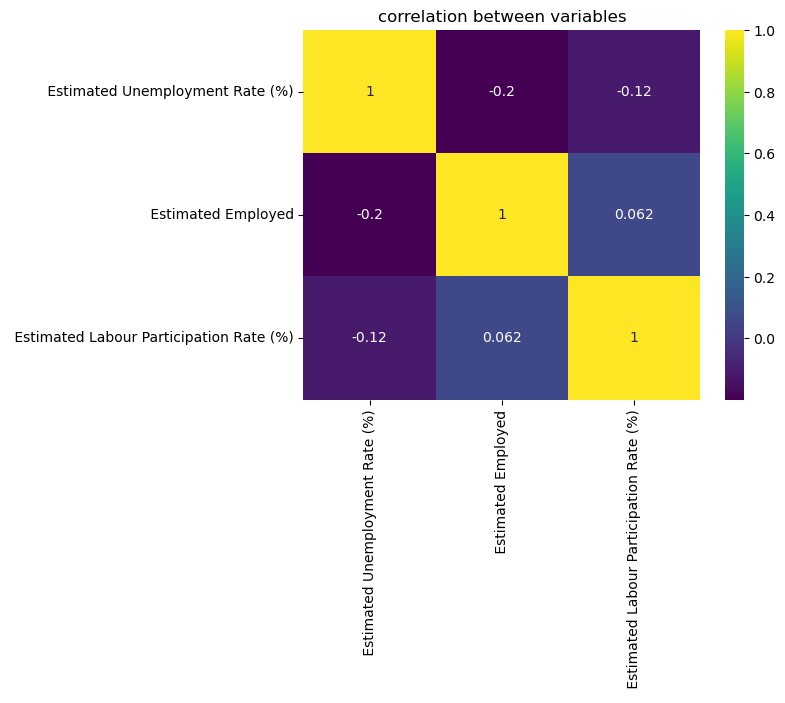

In [30]:
# visualize the data
sns.heatmap(df[float_col].corr(), cmap='viridis', cbar=True, annot=True)
plt.title('correlation between variables')
plt.show();

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldc

<Axes: ylabel='Count'>

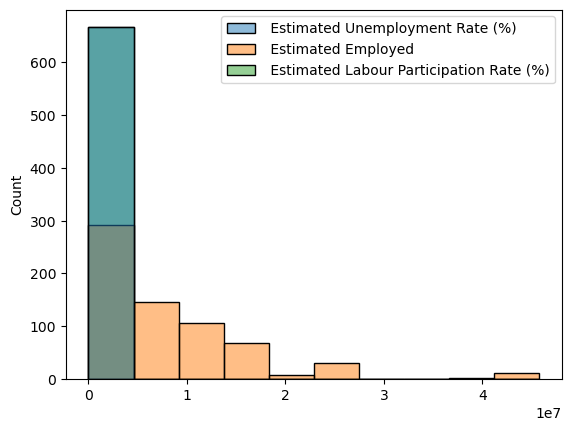

In [31]:
sns.histplot(df, color='skyblue', bins=10)

<Axes: >

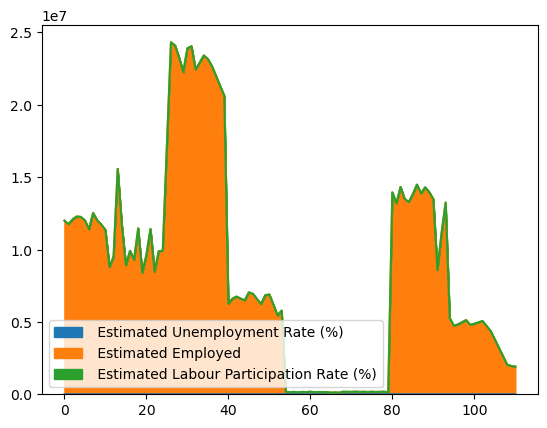

In [83]:
df.iloc[0:100].plot(kind='area')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    666 non-null    object 
 1    Date                                     666 non-null    object 
 2    Frequency                                666 non-null    object 
 3    Estimated Unemployment Rate (%)          666 non-null    float64
 4    Estimated Employed                       666 non-null    float64
 5    Estimated Labour Participation Rate (%)  666 non-null    float64
 6   Area                                      666 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.6+ KB


C:\Users\akim\AppData\Local\Temp\ipykernel_9996\567589922.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Region'], y=df[' Estimated Unemployment Rate (%)'], ci=None, color='green')


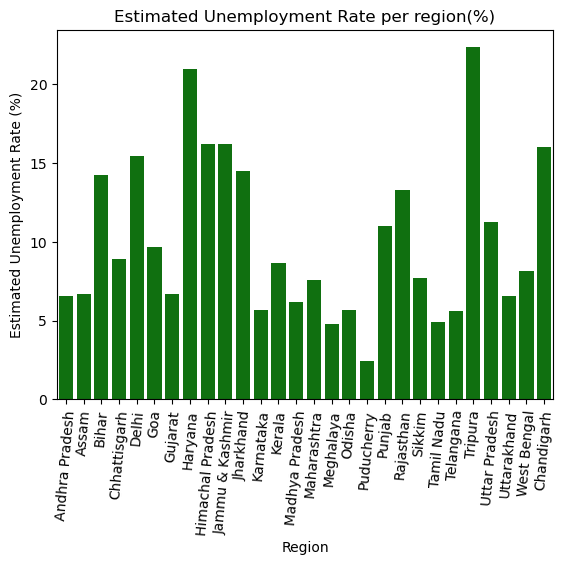

In [34]:
sns.barplot(x=df['Region'], y=df[' Estimated Unemployment Rate (%)'], ci=None, color='green')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=85)
plt.title('Estimated Unemployment Rate per region(%)')
plt.show();

<Axes: >

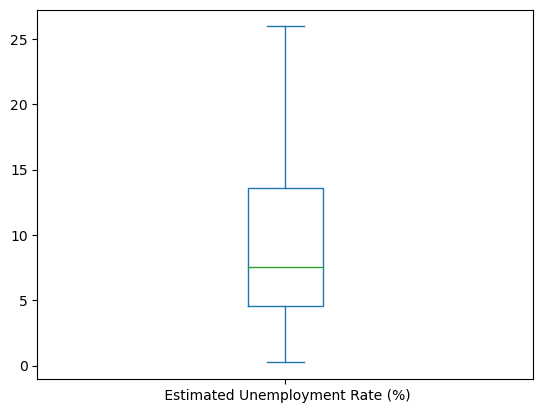

In [35]:
df[' Estimated Unemployment Rate (%)'].plot(kind='box')

C:\Users\akim\AppData\Local\Temp\ipykernel_9996\1867908806.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Area'], y=df[' Estimated Unemployment Rate (%)'], ci=None, color='blue')


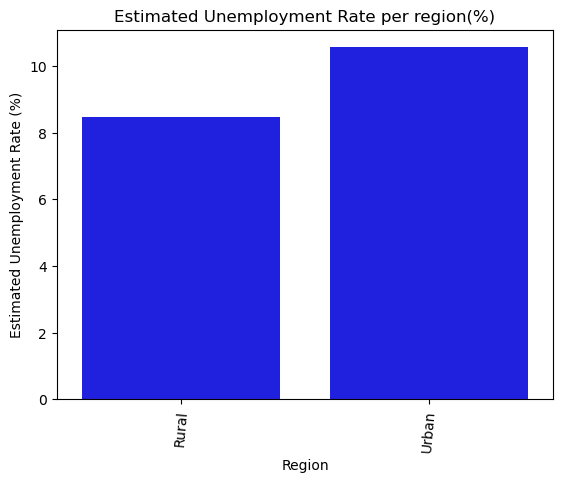

In [36]:
sns.barplot(x=df['Area'], y=df[' Estimated Unemployment Rate (%)'], ci=None, color='blue')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=85)
plt.title('Estimated Unemployment Rate per region(%)')
plt.show();

C:\Users\akim\AppData\Local\Temp\ipykernel_9996\1219084622.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Region'], y=df[' Estimated Employed'], ci=None, color='green', estimator=np.mean)


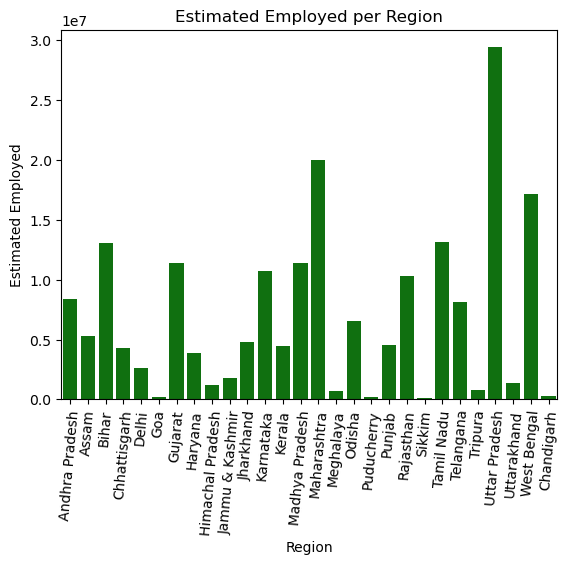

In [37]:
sns.barplot(x=df['Region'], y=df[' Estimated Employed'], ci=None, color='green', estimator=np.mean)
plt.xlabel('Region')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=85)
plt.title('Estimated Employed per Region')
plt.show();

C:\Users\akim\AppData\Local\Temp\ipykernel_9996\883613217.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Area'], y=df[' Estimated Employed'], ci=None, color='red')


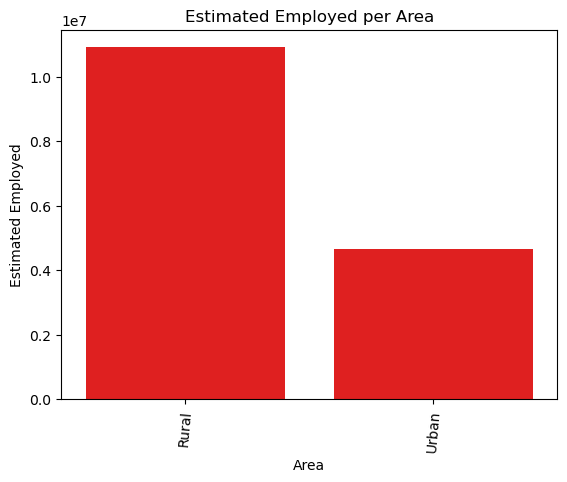

In [81]:
sns.barplot(x=df['Area'], y=df[' Estimated Employed'], ci=None, color='red')
plt.xlabel('Area')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=85)
plt.title('Estimated Employed per Area')
plt.show();

In [39]:
# hypothesis testing
 ## we want to see if there's a relation between the Estimated Unemployment Rate (%) and  the area ?
  ### H0: there's no relation between the two group
  ### H1: there's a relation between the two group

In [40]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Area'], df[' Estimated Unemployment Rate (%)'])
chi2, p_value, dol, expected = chi2_contingency(contingency_table)

In [41]:
if p_value< 0.05:
    print("reject H0:there's no relation between the two group")
else:
    print("accept H0:there's no relation between the two group")

accept H0:there's no relation between the two group


In [42]:
p_value

0.4415818846246235

<Axes: >

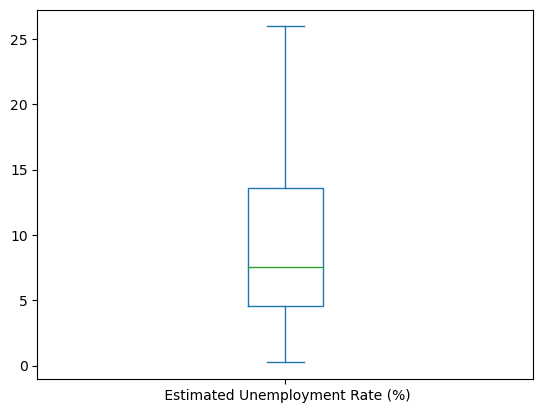

In [43]:
df[' Estimated Unemployment Rate (%)'].plot(kind='box')

<Axes: ylabel='Frequency'>

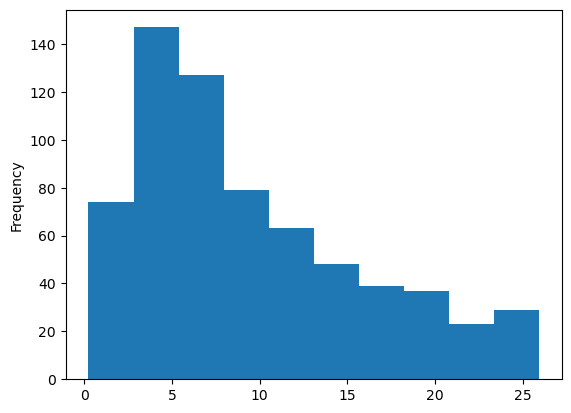

In [44]:
df[' Estimated Unemployment Rate (%)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

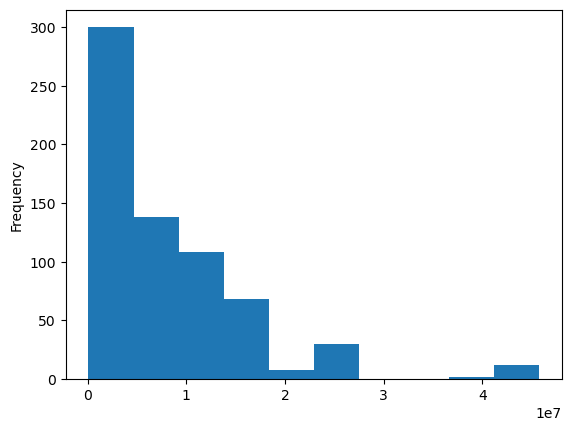

In [45]:
df[' Estimated Employed'].plot(kind='hist')

In [61]:
df[df[' Estimated Unemployment Rate (%)']> df[' Estimated Unemployment Rate (%)'].median()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
11,Andhra Pradesh,30-04-2020,Monthly,16.29,8792827.0,36.03,Rural
12,Andhra Pradesh,31-05-2020,Monthly,14.46,9526902.0,38.16,Rural
24,Assam,31-05-2020,Monthly,9.38,9926176.0,50.00,Rural
26,Bihar,31-05-2019,Monthly,9.27,24322330.0,39.75,Rural
27,Bihar,30-06-2019,Monthly,10.20,24097712.0,39.71,Rural
...,...,...,...,...,...,...,...
744,West Bengal,30-09-2019,Monthly,7.79,11158649.0,45.74,Urban
745,West Bengal,31-10-2019,Monthly,7.83,10563686.0,43.25,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


<Axes: >

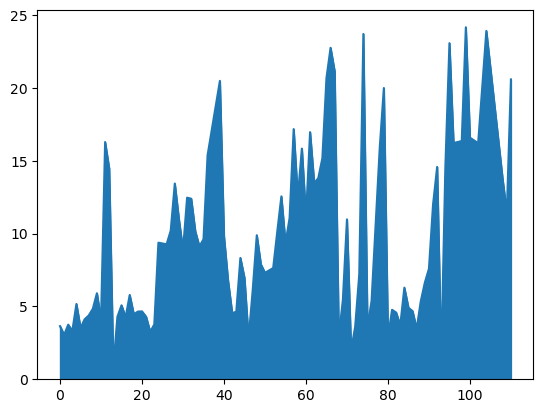

In [84]:
df[' Estimated Unemployment Rate (%)'].iloc[0:100].plot(kind='area')